In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import math

%matplotlib inline

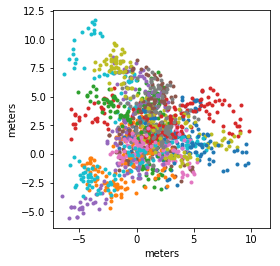

In [10]:
tmp = sio.loadmat("mousetracks.mat")

tracks = {}
for trackno in range(30):
    tracks[trackno] = tmp["num%d"%(trackno)]
    
plt.close("all")
for trackno in range(30):
    plt.plot(tracks[(trackno)][:,0],tracks[(trackno)][:,1],'.')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()

In [24]:
import random
clusters=[[0, 0]]*5
for cluster in range(5):
    clusters[cluster]=[random.random()*17.5-5, random.random()*12.5]
        
print(clusters)

[[8.422257286711872, 9.955731576873394], [0.4476062582415521, 0.7437267817666613], [-4.6261545189663105, 3.813078749713386], [6.802144697893349, 2.8551172582166813], [1.575399637005476, 2.3360907837237708]]


In [25]:


def kmeans(X,K=5,maxiter=100):
    
    # initialize cluster centers
    clust={}
    clusters=np.zeros((5,2))
    for cluster in range(K):
        clusters[cluster]=[random.random()*17.5-5, random.random()*20-8]
        
        clust[cluster]=[]
    
    
    for iter in range(maxiter):
        # cluster assignment update
        
        for m in range(len(X)):
            smallest=1000
            closest=0
            for k in range(K):
                distance= math.sqrt((clusters[k][0]- X[m][0])**2+(clusters[k][1]- X[m][1])**2)
                if distance<smallest:
                    smallest=distance
                    closest=k
            clust[closest].append(X[m])
            # cluster center update
        for key, value in clust.items():
            xSum=0
            ySum=0
            n= len(value)
            if n>0:
                for i in range(n):
                    xSum+= value[i][0]
                    ySum+= value[i][1]

                clusters[key]= [xSum/n, ySum/n]
                clust[key]=[]
                
        
    
            
    return clusters

In [26]:
X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]

In [27]:
final =kmeans(X, K=5, maxiter=100)

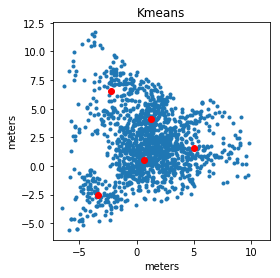

In [28]:

plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
#uncomment to plot your cluster centers
plt.plot(final[:,0], final[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.title('Kmeans')
plt.show()

In [29]:
print(final)

[[ 0.67036912  0.48405935]
 [-2.21881431  6.55083163]
 [ 1.22551992  4.07061447]
 [-3.40256633 -2.52823357]
 [ 5.03260162  1.60696645]]


In [30]:
def kmedians(X,K=5,maxiter=100):
    
    # initialize cluster centers
    clust={}
    clusters=np.zeros((5,2))
    for cluster in range(K):
        clusters[cluster]=[random.random()*17.5-5, random.random()*20-8]
        
        clust[cluster]=[]
    
    
    for iter in range(maxiter):
        # cluster assignment update
        
        for m in range(len(X)):
            smallest=1000
            closest=0
            for k in range(K):
                distance= abs(clusters[k][0]- X[m][0])+abs(clusters[k][1]- X[m][1])
                if distance<smallest:
                    smallest=distance
                    closest=k
            clust[closest].append(X[m])
        
        # cluster center update
        for key, value in clust.items():
            med= np.median(value, 0)

            clusters[key]= med

            clust[key]=[]

            
    return clusters

In [31]:
X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]

In [32]:
final =kmedians(X, K=5, maxiter=100)
print(final)

[[-3.62324376 -2.48609704]
 [ 0.24198852  0.71156866]
 [ 1.55969943  4.06933557]
 [-1.94728697  6.93268635]
 [ 3.5160404   0.93156403]]


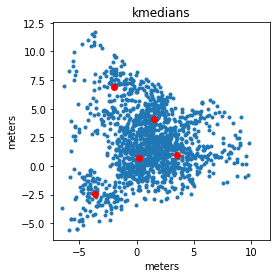

In [33]:

    
plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
#uncomment to plot your cluster centers
plt.plot(final[:,0], final[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.title('kmedians')
plt.show()